Learning and testing some alternatives to get json in a better way, with different approaches. 
Get Json response first.

In [50]:
import requests
# import json
from pandas import json_normalize 

# Send a GET request to the API endpoint
response = requests.get('https://status.digitalocean.com/api/v2/summary.json')
# another api to use: https://api.coinbase.com/v2/exchange-rates?currency=EUR
json_data = response.json() if response and response.status_code == 200 else None

# uncomment this if you want to see raw json
# print(json_data)

Now let's parse the json information and pick the parts we're interested:

In [51]:

# # Load the JSON data from the response
# data = json.loads(response.text)
# 
# # Print the contents of the JSON response
# print(data)

df = json_normalize(json_data)
print(df)

# df = pd.concat([pd.DataFrame(v) for k,v in d.items()], keys=d)

                                          components incidents  \
0  [{'id': 'glhj9rkw3mp8', 'name': 'AMS3', 'statu...        []   

  scheduled_maintenances       page.id     page.name  \
0                     []  w4cz49tckxhp  DigitalOcean   

                         page.url page.time_zone           page.updated_at  \
0  http://status.digitalocean.com        Etc/UTC  2024-01-12T08:26:03.202Z   

  status.indicator       status.description  
0             none  All Systems Operational  


In [53]:
#now I have components

print(df['components'][0])

[{'id': 'glhj9rkw3mp8', 'name': 'AMS3', 'status': 'operational', 'created_at': '2023-02-21T16:23:02.411Z', 'updated_at': '2024-01-08T15:57:06.877Z', 'position': 1, 'description': None, 'showcase': False, 'start_date': '2023-02-21', 'group_id': 'nmb3bbtqfgsj', 'page_id': 'w4cz49tckxhp', 'group': False, 'only_show_if_degraded': False}, {'id': 'xmrt3s9p9lw7', 'name': 'AMS3', 'status': 'operational', 'created_at': '2023-02-22T17:31:21.395Z', 'updated_at': '2024-01-08T00:01:27.819Z', 'position': 1, 'description': None, 'showcase': False, 'start_date': '2023-02-22', 'group_id': 'gb3gs5vj7js2', 'page_id': 'w4cz49tckxhp', 'group': False, 'only_show_if_degraded': False}, {'id': 'z2cshz8pdgwj', 'name': 'AMS3', 'status': 'operational', 'created_at': '2023-02-22T17:38:11.979Z', 'updated_at': '2023-07-20T22:31:03.057Z', 'position': 1, 'description': None, 'showcase': False, 'start_date': '2023-02-22', 'group_id': 'fdg768pfw7v3', 'page_id': 'w4cz49tckxhp', 'group': False, 'only_show_if_degraded': Fa

In [29]:
#import requests

#response = requests.get('https://status.digitalocean.com/api/v2/summary.json')

#json_data = response.json() if response and response.status_code == 200 else None

if json_data and 'components' in json_data:
    
    print(json_data['status']['description'])
    
    #if 'component' in json_data['components']:
    for component in json_data['components']:
        host_name = component.get('name')
        status_text = component.get('status')
        print(host_name, status_text)
         
 #print('test')

All Systems Operational
AMS3 operational
AMS3 operational
AMS3 operational
AMS3 operational
AMS3 operational
API operational
AMS2 operational
AMS2 operational
AMS2 operational
Global operational
Global operational
Global operational
Global operational
Global operational
AMS3 operational
Amsterdam operational
FRA1 operational
AMS3 operational
BLR1 operational
AMS3 operational
FRA1 operational
FRA1 operational
BLR1 operational
BLR1 operational
Billing operational
AMS3 operational
AMS2 operational
AMS2 operational
AMS2 operational
AMS2 operational
Bangalore operational
BLR1 operational
BLR1 operational
NYC3 operational
AMS3 operational
FRA1 operational
BLR1 operational
NYC3 operational
NYC3 operational
FRA1 operational
FRA1 operational
AMS3 operational
AMS3 operational
AMS3 operational
Cloud Control Panel operational
Frankfurt operational
SFO3 operational
FRA1 operational
BLR1 operational
LON1 operational
FRA1 operational
BLR1 operational
LON1 operational
LON1 operational
SFO3 operational

In [47]:
# can I build upon the previous code piece??
print(json_data['status']['description'])

#holy. yes.

All Systems Operational


Now let's see the mathplotlib and if it does something here

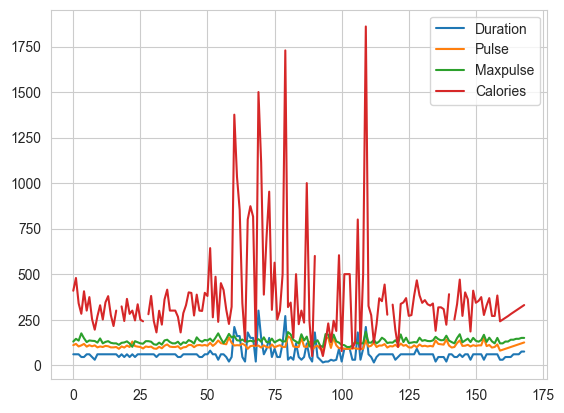

In [45]:
# Import pyplot from Matplotlib and visualize our DataFrame:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

df.plot()

plt.show() 

In [44]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the csv.. looks good tbh
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

# to print out the columns metadata
# df.info()
# df.columns

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [32]:
# describe the dataframe - statistics incoming
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [43]:
# # here we try some plotting.

# # plot style 1
# sns.set_style("whitegrid")
# sns.jointplot(x=df['Time on Website'],y=df['Yearly Amount Spent'],xlim=(33,41),ylim=(200,800),color='brown')
# sns.jointplot(x=df['Time on App'],y=df['Yearly Amount Spent'],xlim=(8,16),ylim=(200,800),color='brown')

# # plot style 2
# sns.set_style('white')
# sns.jointplot(x=df['Time on App'],y=df['Length of Membership'],kind='hex',color='brown')

# # plot style 3
# sns.set_style('whitegrid')
# sns.pairplot(df,height=2)

# try also some linear regression
# # plot style 4
# lmplpot=sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df,height=7,aspect=1)
# lmplpot.set(ylim=(100,900))